## Calculations and plots for blog post 

## 3080Ti 3090 and A100 plots


These are typical imports I do for almost any data analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
import seaborn as sns
sns.set() # not using seaborn but this makes the plots look better
%matplotlib inline

- **Performance data**  HPL: GFLOP/s, Numpy norm(A@B): seconds to complete, NAMD: day/ns
- **Scaling data** (job perf in seconds  vs number of CPU cores)

## ResNet50

In [39]:
dfrn32 = pd.DataFrame({'GPU':[
    'NVIDIA (4) A100 (256)',
    'NVIDIA (2) A100 (256)',
    'NVIDIA (1) A100 (256)',
    'NVIDIA (2) Titan V (96)',
    'NVIDIA RTX 3090 (192)',
    'NVIDIA RTX 3080Ti (96)',
    '*NVIDIA RTX 3080 (96)',
    '*NVIDIA RTX Titan (192)',
    'NVIDIA (1) Titan V (96)',
    '*NVIDIA RTX 2080Ti (96)',
     ], 
    'img/sec':[3666,1940,1021,679,561,558,462,373,363,343]})
dfrn32

,GPU,img/sec
0,NVIDIA (4) A100 (256),3666
1,NVIDIA (2) A100 (256),1940
2,NVIDIA (1) A100 (256),1021
3,NVIDIA (2) Titan V (96),679
4,NVIDIA RTX 3090 (192),561
5,NVIDIA RTX 3080Ti (96),558
6,*NVIDIA RTX 3080 (96),462
7,*NVIDIA RTX Titan (192),373
8,NVIDIA (1) Titan V (96),363
9,*NVIDIA RTX 2080Ti (64),343


10


(-0.5, 499.5, 70.5, -0.5)

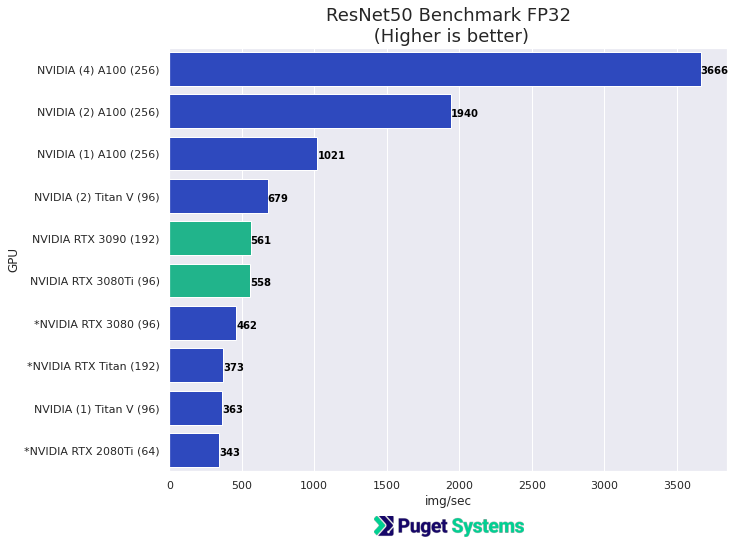

In [43]:
gs = gridspec.GridSpec(2, 1, height_ratios=[20,1] )

ax1 = plt.subplot(gs[0])

a = "#6be0c0" #"#08cc96" #"#f5b7b7" # "#cccccc" #"#E64C4C"# " "#fd411e"
i = "#7389e6" # "#163AD6" # "#130c64" "#0071c5" "#7389E6"
p = "#3e7aff"
m = "#E6CE4C"
d = "#163AD6"

old = "#163AD6"
new = "#08cc96"
#clrs = [i,a,a,a,a,i,a,i,i,i,i,a,a,d,a,i,a]
clrs = ["#163AD6"]*10
print(len(clrs))
#clrs[14] = new
#clrs[17] = new
clrs[5] = new
clrs[4] = new

ax1.set_title('ResNet50 Benchmark FP32\n (Higher is better)', fontsize=18)

ax1.figure.set_figwidth(10)
ax1.figure.set_figheight(9)
ax1 = sns.barplot(y="GPU", x="img/sec", data=dfrn32, palette=clrs )
y = dfrn32['img/sec']
for i, v in enumerate(y):
    ax1.text(v , i + .125, str(v), color='black', fontweight='bold')
    
ax2 = plt.subplot(gs[1])

logo = plt.imread('Puget-Systems-2020-logo-color-500.png') 
img = ax2.imshow(logo)
ax2.axis('off')

In [49]:
dfrn16 = pd.DataFrame({'GPU':[
    'NVIDIA (4) A100 (512)',
    'NVIDIA (2) A100 (512)',
    'NVIDIA (1) A100 (512)',
    'NVIDIA (2) Titan V (192)',
    'NVIDIA RTX 3090 (192)',
    'NVIDIA RTX 3080Ti (192)',
    'NVIDIA (1) Titan V (192)',
    '*NVIDIA RTX Titan (384)',
    '*NVIDIA RTX 3080 (192)',
    '*NVIDIA RTX 2080Ti (192)',
     ], 
    'img/sec':[8795,4645,2529,1983,1163,1271,1091,1082,1023,932]})
dfrn16

,GPU,img/sec
0,NVIDIA (4) A100 (512),8795
1,NVIDIA (2) A100 (512),4645
2,NVIDIA (1) A100 (512),2529
3,NVIDIA (2) Titan V (192),1983
4,NVIDIA RTX 3090 (192),1163
5,NVIDIA RTX 3080Ti (192),1271
6,NVIDIA (1) Titan V (192),1091
7,*NVIDIA RTX Titan (384),1082
8,*NVIDIA RTX 3080 (192),1023
9,*NVIDIA RTX 2080Ti (192),932


10


(-0.5, 499.5, 70.5, -0.5)

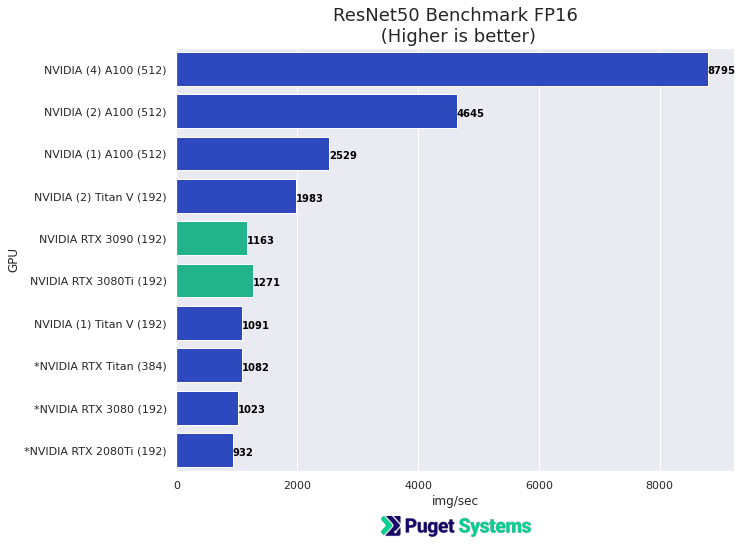

In [50]:
gs = gridspec.GridSpec(2, 1, height_ratios=[20,1] )

ax1 = plt.subplot(gs[0])

a = "#6be0c0" #"#08cc96" #"#f5b7b7" # "#cccccc" #"#E64C4C"# " "#fd411e"
i = "#7389e6" # "#163AD6" # "#130c64" "#0071c5" "#7389E6"
p = "#3e7aff"
m = "#E6CE4C"
d = "#163AD6"

old = "#163AD6"
new = "#08cc96"
#clrs = [i,a,a,a,a,i,a,i,i,i,i,a,a,d,a,i,a]
clrs = ["#163AD6"]*10
print(len(clrs))
#clrs[14] = new
#clrs[17] = new
clrs[5] = new
clrs[4] = new

ax1.set_title('ResNet50 Benchmark FP16\n (Higher is better)', fontsize=18)

ax1.figure.set_figwidth(10)
ax1.figure.set_figheight(9)
ax1 = sns.barplot(y="GPU", x="img/sec", data=dfrn16, palette=clrs )
y = dfrn16['img/sec']
for i, v in enumerate(y):
    ax1.text(v , i + .125, str(v), color='black', fontweight='bold')
    
ax2 = plt.subplot(gs[1])

logo = plt.imread('Puget-Systems-2020-logo-color-500.png') 
img = ax2.imshow(logo)
ax2.axis('off')

## HPL Linpack Performance

In [51]:
dfhpl = pd.DataFrame({'CPU':[
    'NVIDIA (4) A100 cuBLAS',
    'NVIDIA (2) A100 cuBLAS',
    'NVIDIA (1) A100 cuBLAS',
    'NVIDIA (2) Titan V cuBLAS',
    'NVIDIA (1) Titan V cuBLAS',
    'Xeon (2)8352Y 64-core AVX512 oneMKL',
    'Xeon (2)6258R 56-core AVX512 oneMKL',
    'TR Pro 3995WX 64-core AVX2 BLIS2.2',
    'Ryzen 3950X (16 core AVX2 BLIS2)',
    'i9 11900KF (8-core, AVX512 oneMKL)',
    'Ryzen 3900X (12 core AVX2 BLIS2.0)',
    'NVIDIA RTX3090 cuBLAS',
    'NVIDIA RTX3080Ti cuBLAS',
    'i9 9900K (8 core, AVX2 MKL)',
    'Ryzen 5800X (8 core AVX2 BLIS3.0)'
     ], 
    'GFLOP/s':[41220,22850,10940,9008,5567,2905,2667, 1583,637,540,539,525,524,476,415]})
dfhpl



,CPU,GFLOP/s
0,NVIDIA (4) A100 cuBLAS,41220
1,NVIDIA (2) A100 cuBLAS,22850
2,NVIDIA (1) A100 cuBLAS,10940
3,NVIDIA (2) Titan V cuBLAS,9008
4,NVIDIA (1) Titan V cuBLAS,5567
5,Xeon (2)8352Y 64-core AVX512 oneMKL,2905
6,Xeon (2)6258R 56-core AVX512 oneMKL,2667
7,TR Pro 3995WX 64-core AVX2 BLIS2.2,1583
8,Ryzen 3950X (16 core AVX2 BLIS2),637
9,"i9 11900KF (8-core, AVX512 oneMKL)",540


15


(-0.5, 499.5, 70.5, -0.5)

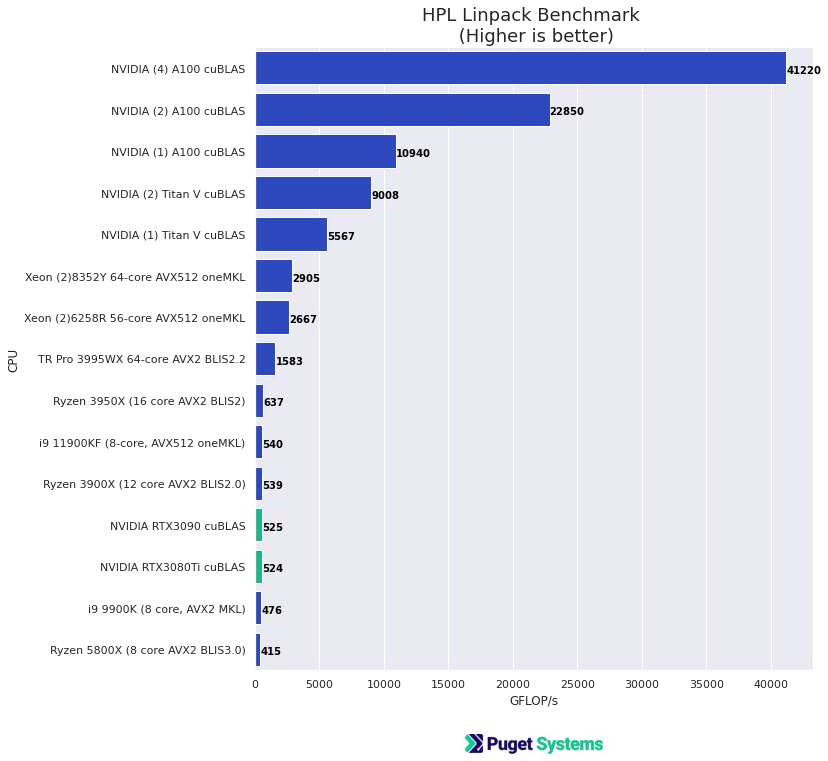

In [14]:
gs = gridspec.GridSpec(2, 1, height_ratios=[32,1] )

ax1 = plt.subplot(gs[0])

a = "#6be0c0" #"#08cc96" #"#f5b7b7" # "#cccccc" #"#E64C4C"# " "#fd411e"
i = "#7389e6" # "#163AD6" # "#130c64" "#0071c5" "#7389E6"
p = "#3e7aff"
m = "#E6CE4C"
d = "#163AD6"

old = "#163AD6"
new = "#08cc96"
#clrs = [i,a,a,a,a,i,a,i,i,i,i,a,a,d,a,i,a]
clrs = ["#163AD6"]*15
print(len(clrs))
#clrs[14] = new
#clrs[17] = new
clrs[11] = new
clrs[12] = new

ax1.set_title('HPL Linpack Benchmark \n (Higher is better)', fontsize=18)

ax1.figure.set_figwidth(10)
ax1.figure.set_figheight(13)
ax1 = sns.barplot(y="CPU", x="GFLOP/s", data=dfhpl, palette=clrs )
y = dfhpl['GFLOP/s']
for i, v in enumerate(y):
    ax1.text(v , i + .125, str(v), color='black', fontweight='bold')
    
ax2 = plt.subplot(gs[1])

logo = plt.imread('Puget-Systems-2020-logo-color-500.png') 
img = ax2.imshow(logo)
ax2.axis('off')

## HPL-AI Linpack Mixed Precision with Tensor Cores Performance

In [17]:
dfhpl_ai = pd.DataFrame({'CPU':[
    'NVIDIA (4) A100 cuBLAS',
    'NVIDIA (2) A100 cuBLAS',
    '**NVIDIA (1) A100 cuBLAS',
    'NVIDIA (2) Titan V cuBLAS',
    'NVIDIA (1) Titan V cuBLAS',
    '*NVIDIA RTX3080Ti cuBLAS',
    '**NVIDIA RTX3090 cuBLAS',
     ], 
    'GFLOP/s':[118600,66400,0,36200,16890,15170,14880]})
dfhpl_ai



,CPU,GFLOP/s
0,NVIDIA (4) A100 cuBLAS,118600
1,NVIDIA (2) A100 cuBLAS,66400
2,**NVIDIA (1) A100 cuBLAS,0
3,NVIDIA (2) Titan V cuBLAS,36200
4,NVIDIA (1) Titan V cuBLAS,16890
5,*NVIDIA RTX3080Ti cuBLAS,15170
6,**NVIDIA RTX3090 cuBLAS,14880


7


(-0.5, 499.5, 70.5, -0.5)

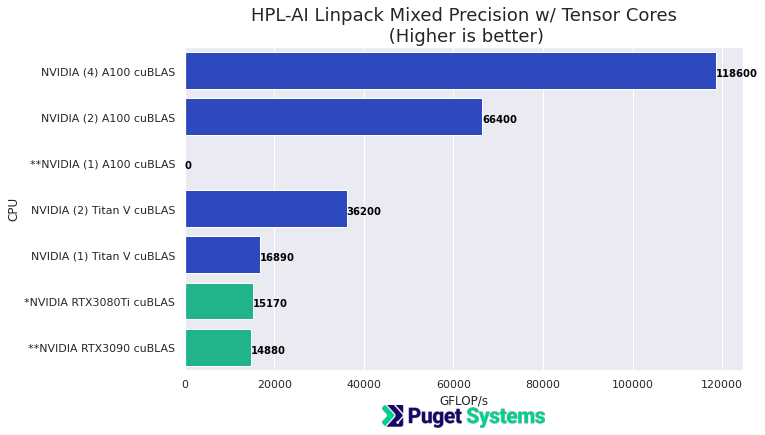

In [57]:
gs = gridspec.GridSpec(2, 1, height_ratios=[14,1] )

ax1 = plt.subplot(gs[0])

a = "#6be0c0" #"#08cc96" #"#f5b7b7" # "#cccccc" #"#E64C4C"# " "#fd411e"
i = "#7389e6" # "#163AD6" # "#130c64" "#0071c5" "#7389E6"
p = "#3e7aff"
m = "#E6CE4C"
d = "#163AD6"

old = "#163AD6"
new = "#08cc96"
#clrs = [i,a,a,a,a,i,a,i,i,i,i,a,a,d,a,i,a]
clrs = ["#163AD6"]*7
print(len(clrs))
#clrs[14] = new
#clrs[17] = new
clrs[5] = new
clrs[6] = new

ax1.set_title('HPL-AI Linpack Mixed Precision w/ Tensor Cores\n (Higher is better)', fontsize=18)

ax1.figure.set_figwidth(10)
ax1.figure.set_figheight(7)
ax1 = sns.barplot(y="CPU", x="GFLOP/s", data=dfhpl_ai, palette=clrs )
y = dfhpl_ai['GFLOP/s']
for i, v in enumerate(y):
    ax1.text(v , i + .125, str(v), color='black', fontweight='bold')
    
ax2 = plt.subplot(gs[1])

logo = plt.imread('Puget-Systems-2020-logo-color-500.png') 
img = ax2.imshow(logo)
ax2.axis('off')

In [36]:
dfhpl_ai = pd.DataFrame({'CPU':[
    'NVIDIA (4) A100 cuBLAS',
    'NVIDIA (2) A100 cuBLAS',
    'NVIDIA (1) A100 cuBLAS',
    'NVIDIA (2) Titan V cuBLAS',
    'NVIDIA (1) Titan V cuBLAS',
    #'Xeon (2)8352Y 64-core AVX512 oneMKL',
    #'Xeon (2)6258R 56-core AVX512 oneMKL',
    #'EPYC (2)7742 120-core-Azure AVX2 BLIS2',
    #'TR Pro 3995WX 64-core AVX2 BLIS2.2',
    #'TR 3990x 64-core AVX2 BLIS2',
     ], 
    'GFLOP/s':[118600,66400,0,36200,16890]}) #,2905,2667, 2483, 1583, 1571]})
dfhpl_ai


,CPU,GFLOP/s
0,NVIDIA (4) A100 cuBLAS,118600
1,NVIDIA (2) A100 cuBLAS,66400
2,NVIDIA (1) A100 cuBLAS,0
3,NVIDIA (2) Titan V cuBLAS,36200
4,NVIDIA (1) Titan V cuBLAS,16890


5


(-0.5, 499.5, 70.5, -0.5)

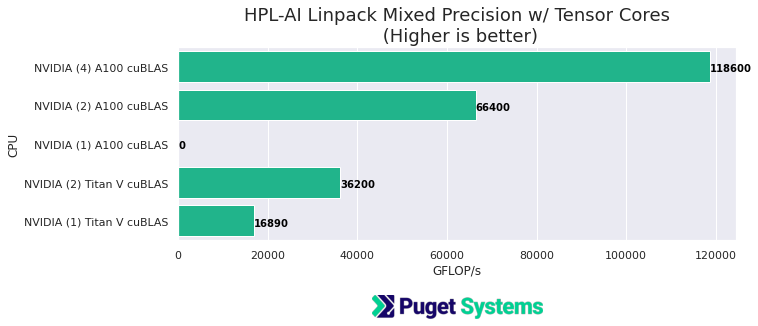

In [57]:
gs = gridspec.GridSpec(2, 1, height_ratios=[8,1] )

ax1 = plt.subplot(gs[0])

a = "#6be0c0" #"#08cc96" #"#f5b7b7" # "#cccccc" #"#E64C4C"# " "#fd411e"
i = "#7389e6" # "#163AD6" # "#130c64" "#0071c5" "#7389E6"
p = "#3e7aff"
m = "#E6CE4C"
d = "#163AD6"

old = "#163AD6"
new = "#08cc96"
#clrs = [i,a,a,a,a,i,a,i,i,i,i,a,a,d,a,i,a]
clrs = ["#163AD6"]*5
print(len(clrs))
#clrs[14] = new
#clrs[17] = new
clrs[0] = new
clrs[1] = new
clrs[2] = new
clrs[3] = new
clrs[4] = new
ax1.set_title('HPL-AI Linpack Mixed Precision w/ Tensor Cores\n (Higher is better)', fontsize=18)

ax1.figure.set_figwidth(10)
ax1.figure.set_figheight(5)
ax1 = sns.barplot(y="CPU", x="GFLOP/s", data=dfhpl_ai, palette=clrs )
y = dfhpl_ai['GFLOP/s']
for i, v in enumerate(y):
    ax1.text(v , i + .125, str(v), color='black', fontweight='bold')

plt.subplots_adjust(hspace = .5)    
ax2 = plt.subplot(gs[1])

logo = plt.imread('Puget-Systems-2020-logo-color-500.png') 
img = ax2.imshow(logo)
ax2.axis('off')

## HPCG

In [4]:
hpcg3265=[1.65,3.13,5.90,10.8,14.3,14.8]
# 1 2 4 8 16 24
hpcg3990=[2.79,4.68,7.96,9.88,10.2,9.94,9.80,9.65,9.54,9.41,9.30]
# 1 2 4 8 16 24 32 40 4 8 56 64
hpcg3970=[2.68,4.56,8.06,9.93,9.80,9.59,9.38]
# 1 2 4 8 16 24 32
hpcgepyc=[2.14,3.98,7.87,13.1,21.2,28.4,31.5,33.1,34.0,31.7,36.6]
numcores2=[ 1, 2, 4, 8, 16, 32, 48, 64, 80, 96, 120]

In [23]:
dfhpcg = pd.DataFrame({'CPU':[
    'NVIDIA (4) A100 cuBLAS',
    'NVIDIA (2) A100 cuBLAS',
    'NVIDIA (1) A100 cuBLAS',
    'NVIDIA (2) Titan V cuBLAS',
    'NVIDIA (1) RTX3090 cuBLAS',
    'NVIDIA (1) RTX3080Ti cuBLAS',
    'NVIDIA (1) Titan V cuBLAS',
    'Xeon (2)6258R 56-core oneMKL',
    'TR Pro 3995WX 64-core(16)',
    'TR 3990x 64-core(16)',
    'TR 3970x 32-Core(8)',
    'i9 11900KF 8-Core(6))',
    'Ryzen 5800X 8-Core(4)'
     ], 
    'GFLOPS':[960, 485, 227, 207, 146, 142, 99.2,34.6,19.8,10.2,9.93,8.69,6.39]})
dfhpcg

,CPU,GFLOPS
0,NVIDIA (4) A100 cuBLAS,960.00
1,NVIDIA (2) A100 cuBLAS,485.00
2,NVIDIA (1) A100 cuBLAS,227.00
3,NVIDIA (2) Titan V cuBLAS,207.00
4,NVIDIA (1) RTX3090 cuBLAS,146.00
5,NVIDIA (1) RTX3080Ti cuBLAS,142.00
6,NVIDIA (1) Titan V cuBLAS,99.20
7,Xeon (2)6258R 56-core oneMKL,34.60
8,TR Pro 3995WX 64-core(16),19.80
9,TR 3990x 64-core(16),10.20


(-0.5, 499.5, 70.5, -0.5)

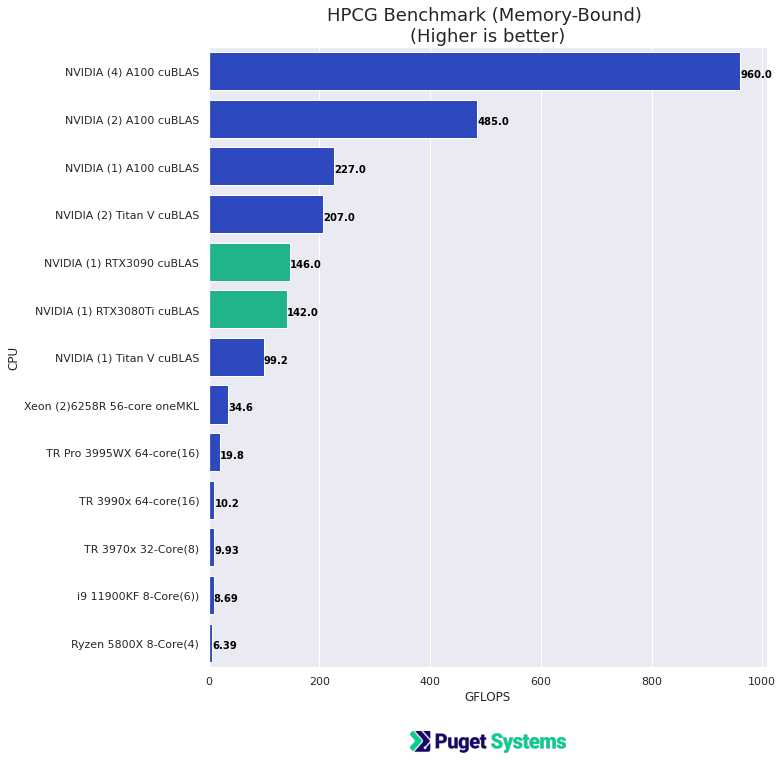

In [59]:
gs = gridspec.GridSpec(2, 1, height_ratios=[28,1])
plt.subplots_adjust(bottom=-0.1)

ax1 = plt.subplot(gs[0])

a = "#6be0c0" #"#08cc96" #"#f5b7b7" # "#cccccc" #"#E64C4C"# " "#fd411e"
i = "#7389e6" # "#163AD6" # "#130c64" "#0071c5" "#7389E6"
p = "#3e7aff"
m = "#E6CE4C"
d = "#163AD6"

#a = "#08cc96"#"#fd411e"
#i = "#130c64"#"#0071c5"
#p = "#3e7aff"
#clrs = (a,d,m,i,d,a,a)

old = "#163AD6"
new = "#08cc96"
#clrs = [i,a,a,a,a,i,a,i,i,i,i,a,a,d,a,i,a]
clrs = ["#163AD6"]*13
#print(len(clrs))
clrs[4] = new
clrs[5] = new

ax1.set_title('HPCG Benchmark (Memory-Bound) \n(Higher is better)', fontsize=18)

ax1.figure.set_figwidth(10)
ax1.figure.set_figheight(10)
ax1 = sns.barplot(y="CPU", x="GFLOPS", data=dfhpcg, palette=clrs )
y = dfhpcg['GFLOPS']
for i, v in enumerate(y):
    ax1.text(v , i + .125, str(v), color='black', fontweight='bold')
    
ax2 = plt.subplot(gs[1])
logo = plt.imread('Puget-Systems-2020-logo-color-500.png') 
ax2.imshow(logo)
ax2.axis('off')

## NAMD ApoA1  3990x vs 3970x Performance

In [12]:
dfapoa1 = pd.DataFrame({'CPU':[
    #'TR Pro 3995WX 64-core + (2)NVIDIA A6000',
    #'TR 3990x 64-core + (2)NVIDIA RTX Titan',
    #'TR 3970x 32-Core + (2)NVIDIA RTX 2080Ti',
    'EPYC (2)7742 120-core(120)',
    'Xeon (2)8352Y 64-core No-HT',
    'TR Pro 3995WX 64-core + 64-SMT',
    'Xeon (2)6258R 56-core + 56-HT',
    'TR 3990x 64-core + 64-SMT',
    'TR 3970x 32-Core + 32-SMT',
    'Xeon 3265W 24-core + 24-HT',
    'Xeon 3265W 24-core(24) No-HT',
    'Xeon 2295W 18-core + 18-HT',
    'i9 11900KF 8-core + 8-HT',
    'Ryzen 5800X 8-core + 8-SMT'
     ], 
    'day/ns':[0.101,0.110248,0.130697,0.1315,0.1325,0.1874,0.270,0.319,0.355,0.419,0.610]})
dfapoa1

,CPU,day/ns
0,EPYC (2)7742 120-core(120),0.101000
1,Xeon (2)8352Y 64-core No-HT,0.110248
2,TR Pro 3995WX 64-core + 64-SMT,0.130697
3,Xeon (2)6258R 56-core + 56-HT,0.131500
4,TR 3990x 64-core + 64-SMT,0.132500
5,TR 3970x 32-Core + 32-SMT,0.187400
6,Xeon 3265W 24-core + 24-HT,0.270000
7,Xeon 3265W 24-core(24) No-HT,0.319000
8,Xeon 2295W 18-core + 18-HT,0.355000
9,i9 11900KF 8-core + 8-HT,0.419000


(-0.5, 499.5, 70.5, -0.5)

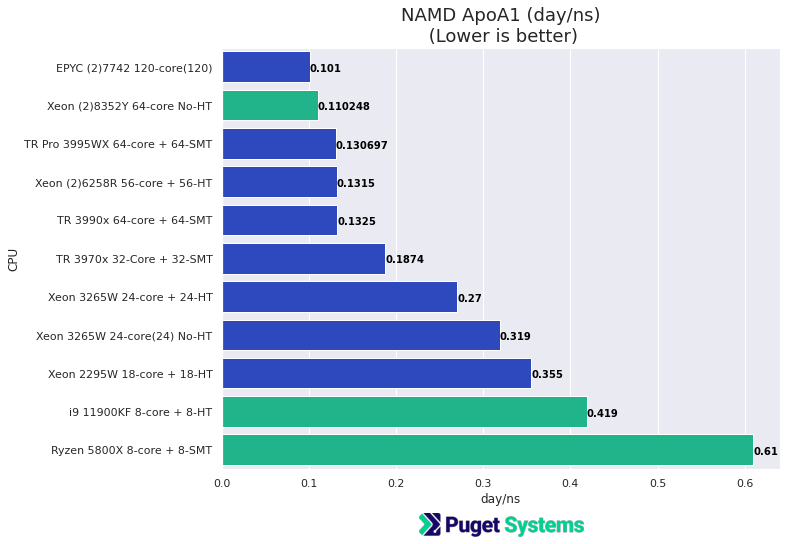

In [13]:
gs = gridspec.GridSpec(2, 1, height_ratios=[18,1])

ax1 = plt.subplot(gs[0])

a = "#6be0c0" #"#08cc96" #"#f5b7b7" # "#cccccc" #"#E64C4C"# " "#fd411e"
i = "#7389e6" # "#163AD6" # "#130c64" "#0071c5" "#7389E6"
p = "#3e7aff"
m = "#E6CE4C"
d = "#163AD6"

#a = "#08cc96"#"#fd411e"
#i = "#130c64"#"#0071c5"
#p = "#3e7aff"
#clrs = (m,a,a,a,m,d,a,a,i,i,d)

old = "#163AD6"
new = "#08cc96"
#clrs = [i,a,a,a,a,i,a,i,i,i,i,a,a,d,a,i,a]
clrs = ["#163AD6"]*11
clrs[9] = new
clrs[10] = new
clrs[1] = new

ax1.set_title('NAMD ApoA1 (day/ns)\n (Lower is better)', fontsize=18)

ax1.figure.set_figwidth(10)
ax1.figure.set_figheight(9)
ax1 = sns.barplot(y="CPU", x="day/ns", data=dfapoa1, palette=clrs )
y = dfapoa1['day/ns']
for i, v in enumerate(y):
    ax1.text(v , i + .125, str(v), color='black', fontweight='bold')
    
ax2 = plt.subplot(gs[1])
logo = plt.imread('Puget-Systems-2020-logo-color-500.png') 
img = ax2.imshow(logo)
ax2.axis('off')

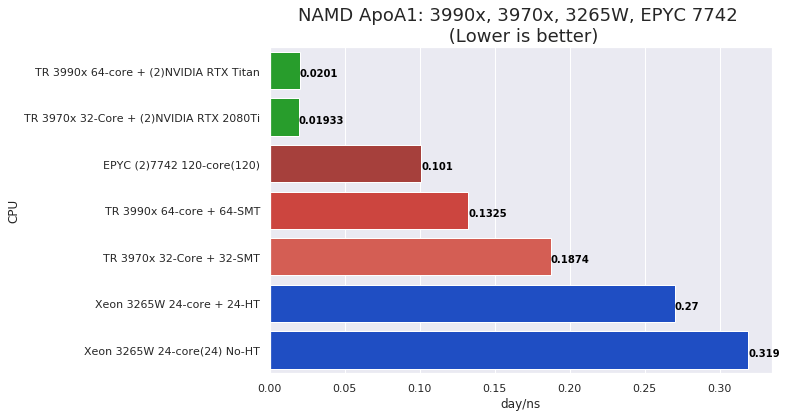

In [85]:
plt.figure(figsize=(9,6))

clrs = sns.color_palette("Reds_d", 7)
#print(clrs)
clrs[0]=sns.xkcd_rgb["green"]
clrs[1]=sns.xkcd_rgb["green"]
clrs[5]=sns.xkcd_rgb["blue"]
clrs[6]=sns.xkcd_rgb["blue"]

ax = sns.barplot(y="CPU", x="day/ns", data=dfapoa1, palette=clrs)
#ax.set_xlim(100,320)
ax.set_title('NAMD ApoA1: 3990x, 3970x, 3265W, EPYC 7742 \n (Lower is better)', fontsize=18)

y = dfapoa1['day/ns']
for i, v in enumerate(y):
    ax.text(v , i + .125, str(v), color='black', fontweight='bold')

## NAMD ApoA1  3990x vs 3970x Scaling

## NAMD STMV  3990x vs 3970x Performance

In [14]:
dfstmv = pd.DataFrame({'CPU':[
    #'TR Pro 3995WX 64-core + (2)NVIDIA A6000',
    #'Xeon 3265W 24-core + (4)NVIDIA RTX 2080Ti',
    #'TR 3990x 64-core + (2)NVIDIA RTX Titan',
    #'TR 3970x 32-Core + (2)NVIDIA RTX 2080Ti',
    'EPYC (2)7742 120-core(120)',
    'Xeon (2)8352Y 64-core No-HT',
    'TR Pro 3995WX 64-core + 64-SMT',
    'Xeon (2)6258R 56-core + 56-HT',
    'TR 3990x 64-core + 64-SMT',
    'TR 3970x 32-Core + 32-SMT',
    'Xeon 3265W 24-core + 24-HT',
    'Xeon 3265W 24-core(24) No-HT',
    'Xeon 2295W 18-core + 18-HT',
    'i9 11900KF 8-core + 8-HT',
    'Ryzen 5800X 8-core + 8-SMT'
     ], 
    'day/ns':[1.016,1.248,1.4012,1.427,1.601,2.124, 3.13, 3.702,4.608,4.925, 6.60]})
dfstmv

,CPU,day/ns
0,EPYC (2)7742 120-core(120),1.0160
1,Xeon (2)8352Y 64-core No-HT,1.2480
2,TR Pro 3995WX 64-core + 64-SMT,1.4012
3,Xeon (2)6258R 56-core + 56-HT,1.4270
4,TR 3990x 64-core + 64-SMT,1.6010
5,TR 3970x 32-Core + 32-SMT,2.1240
6,Xeon 3265W 24-core + 24-HT,3.1300
7,Xeon 3265W 24-core(24) No-HT,3.7020
8,Xeon 2295W 18-core + 18-HT,4.6080
9,i9 11900KF 8-core + 8-HT,4.9250


(-0.5, 499.5, 70.5, -0.5)

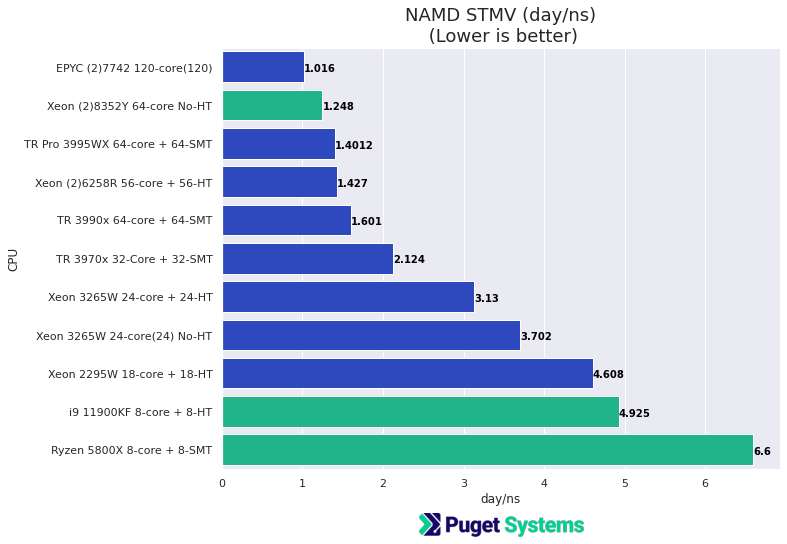

In [15]:
gs = gridspec.GridSpec(2, 1, height_ratios=[18,1])

ax1 = plt.subplot(gs[0])

a = "#6be0c0" #"#08cc96" #"#f5b7b7" # "#cccccc" #"#E64C4C"# " "#fd411e"
i = "#7389e6" # "#163AD6" # "#130c64" "#0071c5" "#7389E6"
p = "#3e7aff"
m = "#E6CE4C"
d = "#163AD6"

#a = "#08cc96"#"#fd411e"
#i = "#130c64"#"#0071c5"
#p = "#3e7aff"
#clrs = (m,i,a,a,a,m,d,a,a,i,i,d)

old = "#163AD6"
new = "#08cc96"
#clrs = [i,a,a,a,a,i,a,i,i,i,i,a,a,d,a,i,a]
clrs = ["#163AD6"]*11
clrs[9] = new
clrs[10] = new
clrs[1] = new

ax1.set_title('NAMD STMV (day/ns)\n (Lower is better)', fontsize=18)

ax1.figure.set_figwidth(10)
ax1.figure.set_figheight(9)
ax1 = sns.barplot(y="CPU", x="day/ns", data=dfstmv, palette=clrs )
y = dfstmv['day/ns']
for i, v in enumerate(y):
    ax1.text(v , i + .125, str(v), color='black', fontweight='bold')
    
ax2 = plt.subplot(gs[1])
logo = plt.imread('Puget-Systems-2020-logo-color-500.png')
img = ax2.imshow(logo)
ax2.axis('off')

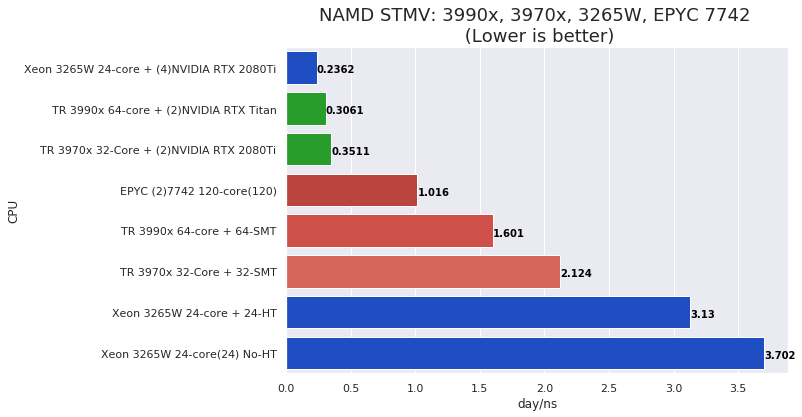

In [87]:
plt.figure(figsize=(9,6))

clrs = sns.color_palette("Reds_d", 8)
#print(clrs)
clrs[0]=sns.xkcd_rgb["blue"]
clrs[1]=sns.xkcd_rgb["green"]
clrs[2]=sns.xkcd_rgb["green"]
clrs[6]=sns.xkcd_rgb["blue"]
clrs[7]=sns.xkcd_rgb["blue"]

ax = sns.barplot(y="CPU", x="day/ns", data=dfstmv, palette=clrs)
#ax.set_xlim(100,320)
ax.set_title('NAMD STMV: 3990x, 3970x, 3265W, EPYC 7742 \n (Lower is better)', fontsize=18)

y = dfstmv['day/ns']
for i, v in enumerate(y):
    ax.text(v , i + .125, str(v), color='black', fontweight='bold')

## NAMD STMV  3990x vs 3970x Scaling